In [49]:
import polars as pl
from datetime import datetime
import matplotlib.pyplot as plt
import json
import datetime

pl.Config().set_tbl_cols(100)
pl.Config().set_tbl_rows(20)

polars.config.Config

In [56]:
#Map route id to correct route name
route_mapping = {
    3: "2L",
    4: "2R",
    33: "3",
    17: "10",
    18: "11",
    23: "12",
    12: "16",
    13: "17",
    14: "18",
    30: "19",
    29: "21",
    38: "21 Tripper",
    777: "777"
}

In [57]:
df = pl.read_parquet("2024-09-entries-start.parquet")
df = df.with_columns(pl.col("routeID").replace_strict(route_mapping))

df


routeID,patternID,equipmentID,tripID,lat,lng,load,capacity,eLoad,blockID,nextStopID,nextStopETA,nextPatternStopID,h,lastStopID,lastPatternStopID,scheduleNumber,inService,onSchedule,trainID,receiveTime,aID,captureTime,direction,seq,lastStopExtID,nextStopExtID,nextStopPctProg,atStop,__index_level_0__
str,i64,str,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,bool,f64,i64,datetime[ns],str,datetime[ns],cat,i64,i64,i64,f64,bool,i64
"""777""",33,"""1001""",null,41.93536,-88.77044,0,0,4,0,0,-1,0,197,491,11402,"""NIS""",false,null,0,2024-08-31 23:59:49,"""35467605078ef4d""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,13
"""777""",9998,"""1002""",null,41.93484,-88.72824,0,0,9,0,0,-1,0,78,0,0,"""NIS""",false,null,0,2024-08-31 15:14:57,"""3546760508796c6""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,14
"""777""",0,"""1003""",null,41.93277,-88.76676,0,0,0,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-08-30 04:47:18,"""3546760504518c0""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,15
"""777""",9998,"""1004""",null,41.93481,-88.7283,0,0,15,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-08-31 09:43:05,"""35467605056be89""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,16
"""777""",9998,"""1101""",null,41.93486,-88.7282,0,0,0,125,0,-1,0,351,0,0,"""NIS""",false,null,0,2024-08-31 05:17:48,"""3546760504edeed""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,17
"""17""",13,"""1102""",10058,41.93558,-88.76723,0,0,237,0,806,1139,10612,2,805,10611,"""8:00:00-17""",true,-658.0,11606,2024-08-31 11:36:01,"""35467605059a8e2""",2024-09-01 00:00:01,"""Outbound""",2,805,806,100.0,true,18
"""777""",9998,"""1103""",null,41.93481,-88.72816,0,0,0,0,0,-1,0,47,0,0,"""NIS""",false,null,0,2024-08-31 02:19:58,"""35467605044c796""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,19
"""777""",0,"""1401""",null,41.93539,-88.77016,0,0,0,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-08-01 19:06:17,"""3546760504ac22e""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,20
"""777""",0,"""1701""",null,41.9348,-88.72831,0,0,0,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-08-10 04:51:32,"""3546760504a404a""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,21


In [58]:
# Load json
file = open("stops.json", "r")
stopsData = json.load(file)

stops = pl.DataFrame(stopsData['get_stops'])
stops

rid,rsid,id,name,lat,lng,extID,shortName
i64,i64,i64,str,f64,f64,str,str
3,197057,449,"""Anderson Hall""",41.938465,-88.761086,"""449""","""449"""
3,197056,448,"""Barsema Hall""",41.939774,-88.761009,"""448""","""448"""
3,197054,446,"""Castle Dr. at College Ave.""",41.93412,-88.763115,"""446""","""446"""
3,197053,445,"""Castle Dr. at Montgomery""",41.9324,-88.762863,"""445""","""445"""
3,197044,436,"""Convocation Center Entrance 3""",41.936459,-88.785286,"""436""","""436"""
3,197428,820,"""DuSable Turnaround Rt 2L / 2R""",41.934803,-88.769974,"""""","""538"""
3,197055,447,"""Gilbert Way at Art Building""",41.935471,-88.762093,"""447""","""447"""
3,197074,466,"""Grant North""",41.938599,-88.777321,"""466""","""466"""
3,197058,450,"""Health Services on Lucinda Ave…",41.936481,-88.764244,"""450""","""450"""


In [59]:
#Left join stops to get stop names for nextStopID and lastStopID
df = df.join(stops.rename({"id": "nextStopID"}).select(["nextStopID", "name"]), on="nextStopID", how="left").rename({"name": "nextStopName"})
df = df.join(stops.rename({"id": "lastStopID"}).select(["lastStopID", "name"]), on="lastStopID", how="left").rename({"name": "lastStopName"})

df

routeID,patternID,equipmentID,tripID,lat,lng,load,capacity,eLoad,blockID,nextStopID,nextStopETA,nextPatternStopID,h,lastStopID,lastPatternStopID,scheduleNumber,inService,onSchedule,trainID,receiveTime,aID,captureTime,direction,seq,lastStopExtID,nextStopExtID,nextStopPctProg,atStop,__index_level_0__,nextStopName,lastStopName
str,i64,str,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,bool,f64,i64,datetime[ns],str,datetime[ns],cat,i64,i64,i64,f64,bool,i64,str,str
"""777""",33,"""1001""",null,41.93536,-88.77044,0,0,4,0,0,-1,0,197,491,11402,"""NIS""",false,null,0,2024-08-31 23:59:49,"""35467605078ef4d""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,13,null,"""Normal Rd. at Northern Lane"""
"""777""",33,"""1001""",null,41.93536,-88.77044,0,0,4,0,0,-1,0,197,491,11402,"""NIS""",false,null,0,2024-08-31 23:59:49,"""35467605078ef4d""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,13,null,"""Normal Rd. at Northern Lane"""
"""777""",33,"""1001""",null,41.93536,-88.77044,0,0,4,0,0,-1,0,197,491,11402,"""NIS""",false,null,0,2024-08-31 23:59:49,"""35467605078ef4d""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,13,null,"""Normal Rd. at Northern Lane"""
"""777""",9998,"""1002""",null,41.93484,-88.72824,0,0,9,0,0,-1,0,78,0,0,"""NIS""",false,null,0,2024-08-31 15:14:57,"""3546760508796c6""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,14,null,null
"""777""",0,"""1003""",null,41.93277,-88.76676,0,0,0,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-08-30 04:47:18,"""3546760504518c0""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,15,null,null
"""777""",9998,"""1004""",null,41.93481,-88.7283,0,0,15,0,0,-1,0,0,0,0,"""NIS""",false,null,0,2024-08-31 09:43:05,"""35467605056be89""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,16,null,null
"""777""",9998,"""1101""",null,41.93486,-88.7282,0,0,0,125,0,-1,0,351,0,0,"""NIS""",false,null,0,2024-08-31 05:17:48,"""3546760504edeed""",2024-09-01 00:00:01,null,-1,-1,-1,null,false,17,null,null
"""17""",13,"""1102""",10058,41.93558,-88.76723,0,0,237,0,806,1139,10612,2,805,10611,"""8:00:00-17""",true,-658.0,11606,2024-08-31 11:36:01,"""35467605059a8e2""",2024-09-01 00:00:01,"""Outbound""",2,805,806,100.0,true,18,"""Lucinda Ave at Wirtz Dr Stop #…","""Holmes Student Center Stop #73…"
"""17""",13,"""1102""",10058,41.93558,-88.76723,0,0,237,0,806,1139,10612,2,805,10611,"""8:00:00-17""",true,-658.0,11606,2024-08-31 11:36:01,"""35467605059a8e2""",2024-09-01 00:00:01,"""Outbound""",2,805,806,100.0,true,18,"""Lucinda Ave at Wirtz Dr Stop #…","""Holmes Student Center Stop #73…"


In [72]:
#Select a subset with route 2L, inService and tripID equipmentID 902
subset = df.filter(
    (pl.col("routeID") == "2L") &
    (pl.col("inService") == True)
)

# subset = subset.with_columns(
#     (pl.col("nextStopID") != pl.col("nextStopID").shift(1)).alias("stopChanged")
# )

subset = subset.with_columns(
    (pl.col("nextStopID").diff().over("equipmentID") != 0).alias("stopChanged")
)

subset[["routeID", "equipmentID", "lat", "lng", "nextStopID", "lastStopID", "nextStopName", "lastStopName", "receiveTime", "captureTime", "stopChanged"]]

routeID,equipmentID,lat,lng,nextStopID,lastStopID,nextStopName,lastStopName,receiveTime,captureTime,stopChanged
str,str,f64,f64,i64,i64,str,str,datetime[ns],datetime[ns],bool
"""2L""","""Old_1501""",41.93595,-88.76718,820,431,"""DuSable Turnaround Rt 2L / 2R""","""Student Center""",2024-08-31 23:59:49,2024-09-01 00:00:01,null
"""2L""","""Old_1501""",41.93595,-88.76718,820,431,"""DuSable Turnaround Rt 2L / 2R""","""Student Center""",2024-08-31 23:59:49,2024-09-01 00:00:01,false
"""2L""","""Old_1501""",41.93595,-88.76718,820,431,"""DuSable Turnaround Rt 2L / 2R""","""Student Center""",2024-08-31 23:59:49,2024-09-01 00:00:01,false
"""2L""","""Old_1501""",41.93595,-88.76718,820,431,"""DuSable Turnaround Rt 2L / 2R""","""Student Center""",2024-08-31 23:59:49,2024-09-01 00:00:01,false
"""2L""","""Old_1501""",41.93595,-88.76718,820,431,"""DuSable Turnaround Rt 2L / 2R""","""Student Center""",2024-08-31 23:59:49,2024-09-01 00:00:01,false
"""2L""","""Old_1501""",41.93595,-88.76718,820,431,"""DuSable Turnaround Rt 2L / 2R""","""Student Center""",2024-09-01 00:00:00,2024-09-01 00:00:16,false
"""2L""","""Old_1501""",41.93595,-88.76718,820,431,"""DuSable Turnaround Rt 2L / 2R""","""Student Center""",2024-09-01 00:00:00,2024-09-01 00:00:16,false
"""2L""","""Old_1501""",41.93595,-88.76718,820,431,"""DuSable Turnaround Rt 2L / 2R""","""Student Center""",2024-09-01 00:00:00,2024-09-01 00:00:16,false
"""2L""","""Old_1501""",41.93595,-88.76718,820,431,"""DuSable Turnaround Rt 2L / 2R""","""Student Center""",2024-09-01 00:00:00,2024-09-01 00:00:16,false


In [74]:
#Display round trip time from and to the student center
graphSet = subset.filter((pl.col("stopChanged") == True) & (pl.col("nextStopID") == 431))

graphSet = graphSet.with_columns(
    (pl.col("receiveTime") - pl.col("receiveTime").shift(1)).alias("timeDiff")
)

graphSet = graphSet.filter((pl.col("timeDiff") < datetime.timedelta(hours=1)))

graphSet[["routeID", "equipmentID", "lat", "lng", "nextStopID", "lastStopID", "nextStopName", "lastStopName", "receiveTime", "captureTime", "timeDiff"]]

routeID,equipmentID,lat,lng,nextStopID,lastStopID,nextStopName,lastStopName,receiveTime,captureTime,timeDiff
str,str,f64,f64,i64,i64,str,str,datetime[ns],datetime[ns],duration[ns]
"""2L""","""1103""",41.93644,-88.76536,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-01 00:50:18,2024-09-01 00:50:25,30m 25s
"""2L""","""1103""",41.93644,-88.7638,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-01 01:18:27,2024-09-01 01:18:39,28m 9s
"""2L""","""1103""",41.93644,-88.76363,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-01 01:48:59,2024-09-01 01:49:09,30m 32s
"""2L""","""1103""",41.93645,-88.76472,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-01 02:16:27,2024-09-01 02:16:37,27m 28s
"""2L""","""1103""",41.93644,-88.7636,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-01 02:49:30,2024-09-01 02:49:38,33m 3s
"""2L""","""1103""",41.93644,-88.76539,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-01 03:18:19,2024-09-01 03:18:22,28m 49s
"""2L""","""1103""",41.93644,-88.7656,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-01 03:48:58,2024-09-01 03:49:07,30m 39s
"""2L""","""1103""",41.93645,-88.76451,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-01 04:15:01,2024-09-01 04:15:05,26m 3s
"""2L""","""1103""",41.93645,-88.76443,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-01 04:45:20,2024-09-01 04:45:35,30m 19s


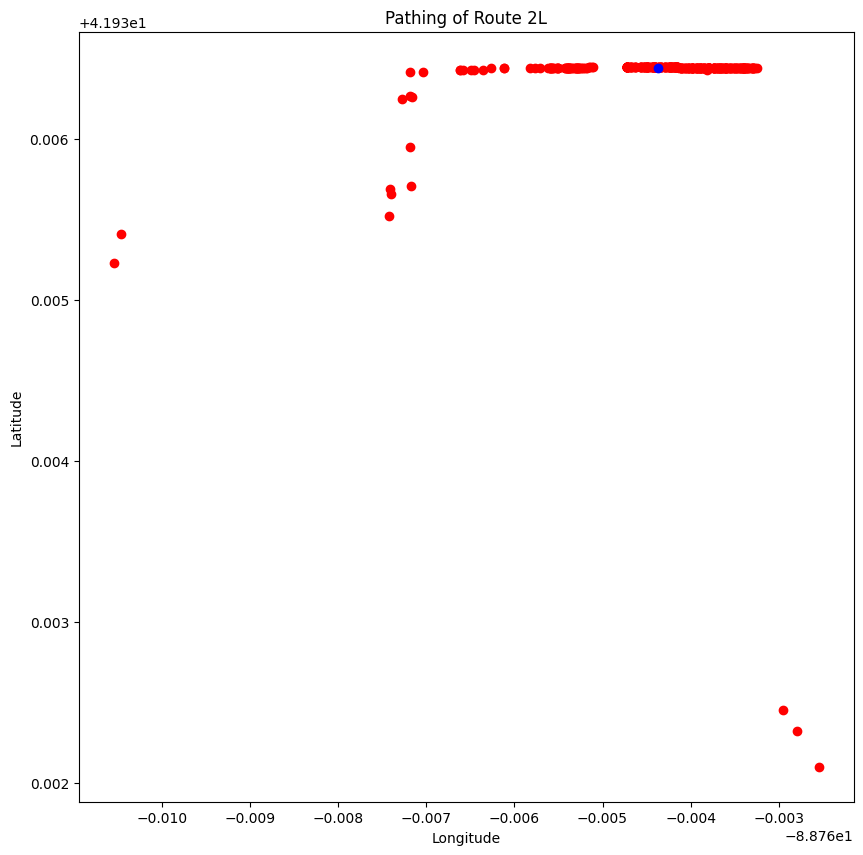

In [75]:

plt.figure(figsize=(10, 10))
plt.scatter(graphSet['lng'], graphSet['lat'], c='red', marker='o')
plt.scatter(-88.76437, 41.93644, c='blue', marker='o')
plt.title('Pathing of Route 2L')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [78]:
stopA = subset.filter((pl.col("stopChanged") == True) & (pl.col("nextStopID") == 431))
stopB = subset.filter((pl.col("stopChanged") == True) & (pl.col("nextStopID") == 466))

stopB = stopB.with_columns(
    (pl.col("receiveTime").alias("receiveTime_right"))
)

final = stopA.join_asof(stopB, on="receiveTime", by="equipmentID", strategy="forward")


final = final.with_columns(
    (pl.col("receiveTime_right") - pl.col("receiveTime")).alias("timeDiffFinal")
)


final["routeID", "equipmentID", "nextStopName", "lastStopName", "timeDiffFinal"]

final["timeDiffFinal"].describe()

statistic,value
str,str
"""count""","""357"""
"""null_count""","""13"""
"""mean""","""0:59:19.873949"""
"""min""","""0:03:31"""
"""25%""","""0:10:41"""
"""50%""","""0:13:02"""
"""75%""","""0:15:21"""
"""max""","""4 days, 7:42:58"""


In [42]:
graphSet["lat", "lng"].describe()

statistic,lat,lng
str,f64,f64
"""count""",67.0,67.0
"""null_count""",0.0,0.0
"""mean""",41.936443,-88.764464
"""std""",0.000005,0.000873
"""min""",41.93643,-88.76658
"""25%""",41.93644,-88.76524
"""50%""",41.93644,-88.76437
"""75%""",41.93645,-88.7637
"""max""",41.93645,-88.76335


(array([2.211e+03, 3.200e+01, 4.000e+01, 3.200e+01, 3.800e+01, 2.900e+01,
        2.000e+01, 1.300e+01, 1.100e+01, 1.300e+01, 5.000e+00, 3.000e+00,
        6.000e+00, 1.600e+01, 2.000e+01, 2.300e+01, 1.700e+01, 7.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 5.000e+00]),
 array([  -6.        ,  113.53333333,  233.06666667,  352.6       ,
         472.13333333,  591.66666667,  711.2       ,  830.73333333,
         950.26666667, 1069.8       , 1189.33333333, 1308.86666667,
        1428.4       , 1547.93333333, 1667.46666667, 1787.        ,
        1906.53333333, 2026.06666667, 2145.6       , 2265.13333333,
        2384.66666667, 2504.2       , 2623.73333333, 2743.26666667,
        2862.8       , 2982.33333333, 3101.86666667, 3221.4       ,
        3340.93333333, 3460.46666667, 3580.        ]),
 <BarContainer object of 30 artists>)

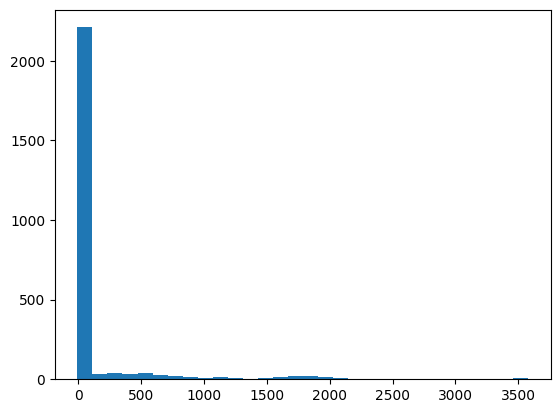

In [71]:

graphSet["timeDiff"].describe()

plt.hist(graphSet["timeDiff"].dt.total_seconds(), bins=30)

In [ ]:

#Display round trip time from and to the student center
graphSet = subset.filter((pl.col("stopChanged") == True) & (pl.col("nextStopID") == 431))
graphSet[["routeID", "equipmentID", "lat", "lng", "nextStopID", "lastStopID", "nextStopName", "lastStopName", "receiveTime", "captureTime"]]


routeID,equipmentID,lat,lng,nextStopID,lastStopID,nextStopName,lastStopName,receiveTime,captureTime
str,str,f64,f64,i64,i64,str,str,datetime[ns],datetime[ns]
"""2L""","""902""",41.93644,-88.76402,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-03 19:45:03,2024-09-03 19:45:12
"""2L""","""902""",41.93644,-88.76398,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-03 20:13:52,2024-09-03 20:13:56
"""2L""","""902""",41.93644,-88.76612,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-03 20:50:24,2024-09-03 20:50:29
"""2L""","""902""",41.93644,-88.76341,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-03 21:14:05,2024-09-03 21:14:10
"""2L""","""902""",41.93645,-88.76434,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-03 21:43:13,2024-09-03 21:43:25
"""2L""","""902""",41.93644,-88.76407,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-03 22:13:55,2024-09-03 22:14:10
"""2L""","""902""",41.93645,-88.76472,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-03 22:44:48,2024-09-03 22:44:55
"""2L""","""902""",41.93645,-88.76421,431,450,"""Student Center""","""Health Services on Lucinda Ave…",2024-09-03 23:15:50,2024-09-03 23:15:55
"""2L""","""902""",41.93245,-88.76295,431,0,"""Student Center""",null,2024-09-04 13:10:43,2024-09-04 13:10:52
